# Load DataSet

In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


In [58]:
df.dtypes

MolLogP               float64
MolWt                 float64
NumRotatableBonds     float64
AromaticProportion    float64
logS                  float64
dtype: object

# Data seperation as a X and Y

In [6]:
y=df['logS']

In [7]:
print(y)

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64


In [10]:
x=df.drop('logS', axis=1)
print(x)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0     2.59540  167.850                0.0            0.000000
1     2.37650  133.405                0.0            0.000000
2     2.59380  167.850                1.0            0.000000
3     2.02890  133.405                1.0            0.000000
4     2.91890  187.375                1.0            0.000000
...       ...      ...                ...                 ...
1139  1.98820  287.343                8.0            0.000000
1140  3.42130  286.114                2.0            0.333333
1141  3.60960  308.333                4.0            0.695652
1142  2.56214  354.815                3.0            0.521739
1143  2.02164  179.219                1.0            0.461538

[1144 rows x 4 columns]


# Seperating Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_test)
print(y_test)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
822   2.91000  172.268                7.0            0.000000
118   7.27400  360.882                1.0            0.666667
347   1.94040  145.161                0.0            0.909091
1123  1.98640  119.378                0.0            0.000000
924   1.70062  108.140                0.0            0.750000
...       ...      ...                ...                 ...
1114  1.76210  478.513                4.0            0.000000
427   6.32820  276.338                0.0            1.000000
711   0.04430  218.205                5.0            0.000000
4     2.91890  187.375                1.0            0.000000
948   3.56010  318.328                2.0            0.750000

[229 rows x 4 columns]
822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64


# Building Model using Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression();
lr.fit(x_train,y_train)

LinearRegression()

# here model is build now we apply this model to make predictions

# # Applying model to make prediction

In [23]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

# # comparing predicted and original values 


# ## Evaluate Model performance

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train, y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [32]:
lr_train_mse

1.0075362951093687

In [33]:
lr_train_r2

0.7645051774663391

In [30]:
lr_test_mse

1.0206953660861033

In [31]:
lr_test_r2

0.7891616188563282

In [35]:
lr_results=pd.DataFrame(['LinearRegression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results

,0,1,2,3,4
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


# Data Visualization on Predicted model

Text(0.5, 0, 'Experimented LogS')

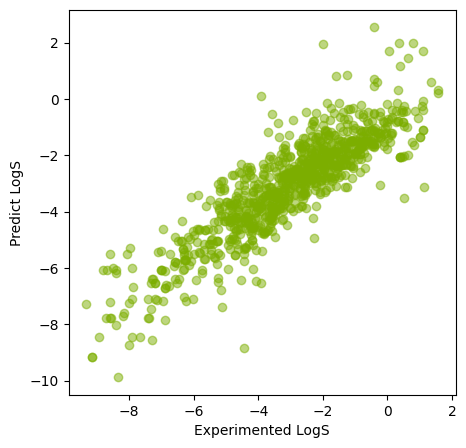

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred,alpha=0.5,c='#7CAE00')
plt.plot()
plt.ylabel('Predict LogS')
plt.xlabel('Experimented LogS')

In [48]:
import pickle

In [49]:
pickle.dump(lr,open('model.pkl','wb'))

In [50]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\advance\appdata\roaming\python\python39\site-packages
Requires: threadpoolctl, scipy, joblib, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.
